In [109]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [110]:
N = 100

In [111]:
stand_norm = sts.norm(0,1)
X = stand_norm.rvs(N)

# (a)
### Пусть $X_1$,$\ldots,X_n \sim \mathrm{N}(\mu,\sigma^2)$ — независимая выборка из нормального распределения, где $\sigma^2$ — известная дисперсия. Определим произвольное $\gamma\in [0,1]$ и построим доверительный интервал для неизвестного среднего $\mu$.

### Утверждение. Случайная величина

   $\large Z =  \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}$

### имеет стандартное нормальное распределение $\mathrm{N}(0,1)$. 

### Пусть $z_{\gamma} — \gamma$-квантиль стандартного нормального распределения. Тогда в силу симметрии последнего имеем:

   $\large\mathbb{P}\left(-z_{1-\frac{\gamma}{2}} \le Z \le z_{1-\frac{\gamma}{2}}\right) = 1-\gamma.$

### Квантили стандартного нормального распределения
<table class="wikitable">
<tr>
<td><b>Вероятность (уровень квантили),&#160;%</b></td>
<td>99,99</td>
<td>99,90</td>
<td>99,00</td>
<td>97,72</td>
<td>97,50</td>
<td>95,00</td>
<td>90,00</td>
<td>84,13</td>
<td>50,00</td>
</tr>
<tr>
<td><b>Квантиль</b></td>
<td>3,715</td>
<td>3,090</td>
<td>2,326</td>
<td>2,000</td>
<td>1,960</td>
<td>1,645</td>
<td>1,282</td>
<td>1,000</td>
<td>0,000</td>
</tr>
</table>

#### После подстановки выражения для Z и несложных алгебраических преобразований получаем пункт (a) при $\gamma=0.95$:

   $\large \mathbb{P}\left( \bar{X} - z_{1-\frac{\gamma}{2}} \frac{\sigma}{\sqrt{n}} \le \mu \le \bar{X} + z_{1-\frac{\gamma}{2}} \frac{\sigma}{\sqrt{n}}\right) = 1-\gamma.$

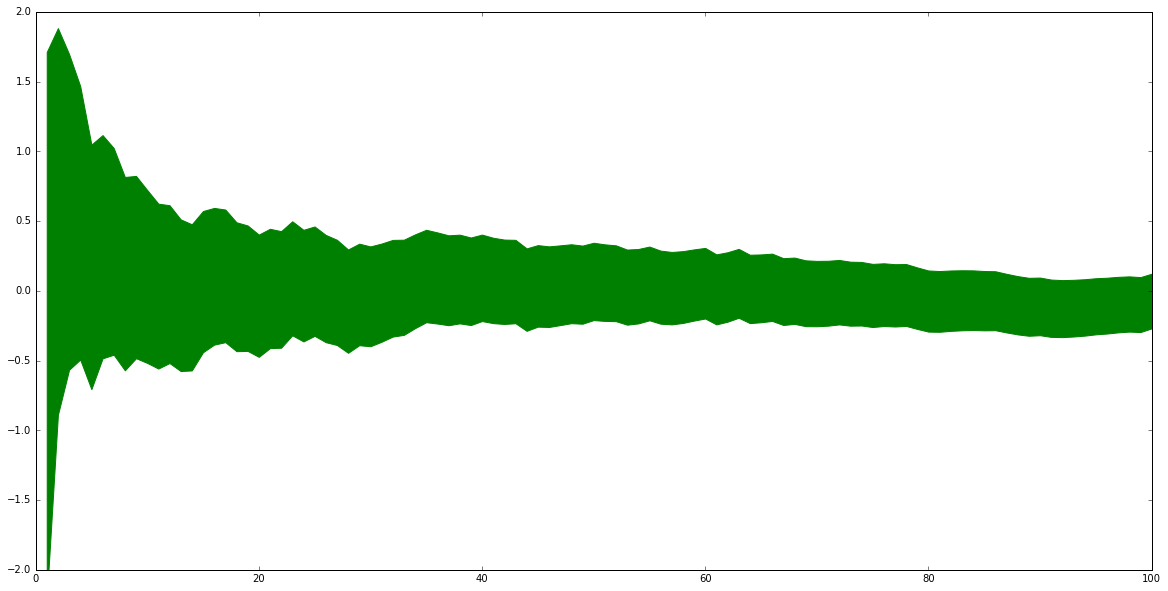

In [112]:
#gamma = 0.05
#quantile 1 - gamma/2 = 1 - 0.05/2=0.975
sigma  = 1
quantile = 1.960
est_left = np.array([X[:n].mean() - quantile/math.sqrt(n)  for n in range(1,101,1)])
est_right = np.array([X[:n].mean() + quantile/math.sqrt(n) for n in range(1,101,1)])
x = np.arange(1,101,1)
plt.figure(figsize=(20,10))
plt.fill_between(x, est_left, est_right, color = "green")
plt.plot(x, np.linspace(0,0,100), color='red')
plt.ylim(-2,2)
plt.show()

Как видим, прекрасный доверительный интервал!

# (c)
### Пусть $\large X_1,\ldots,X_n \sim \mathrm{N}(\mu,\sigma^2)$ — независимая выборка из нормального распределения, где $\large\mu$,$\large\sigma^2$ — неизвестные константы. Построим доверительный интервал для неизвестного среднего $\large\mu$.

### Утверждение. Случайная величина

   $\large T = \frac{\bar{X} - \mu}{S / \sqrt{n}},$

### где $\large S$ — несмещённое выборочное стандартное отклонение, имеет распределение Стьюдента с $\large n-1$ степенями свободы $\large\mathrm{t}(n-1)$. Пусть $\large t_{\alpha,n-1} — \alpha$-квантили распределения Стьюдента. Тогда в силу симметрии последнего имеем:

   $\large\mathbb{P}\left(-t_{1-\frac{\alpha}{2},n-1} \le T \le t_{1-\frac{\alpha}{2},n-1}\right) =1-\alpha$.

#### После подстановки выражения для T и несложных алгебраических преобразований получаем пункт (с):

   $\large\mathbb{P}\left( \bar{X} - t_{1-\frac{\alpha}{2},n-1} \frac{S}{\sqrt{n}} \le \mu \le \bar{X} + t_{1-\frac{\alpha}{2},n-1} \frac{S}{\sqrt{n}}\right) = 1-\alpha$. 

$\large \gamma = 1-\alpha = 0.95,\ \alpha=0.05$

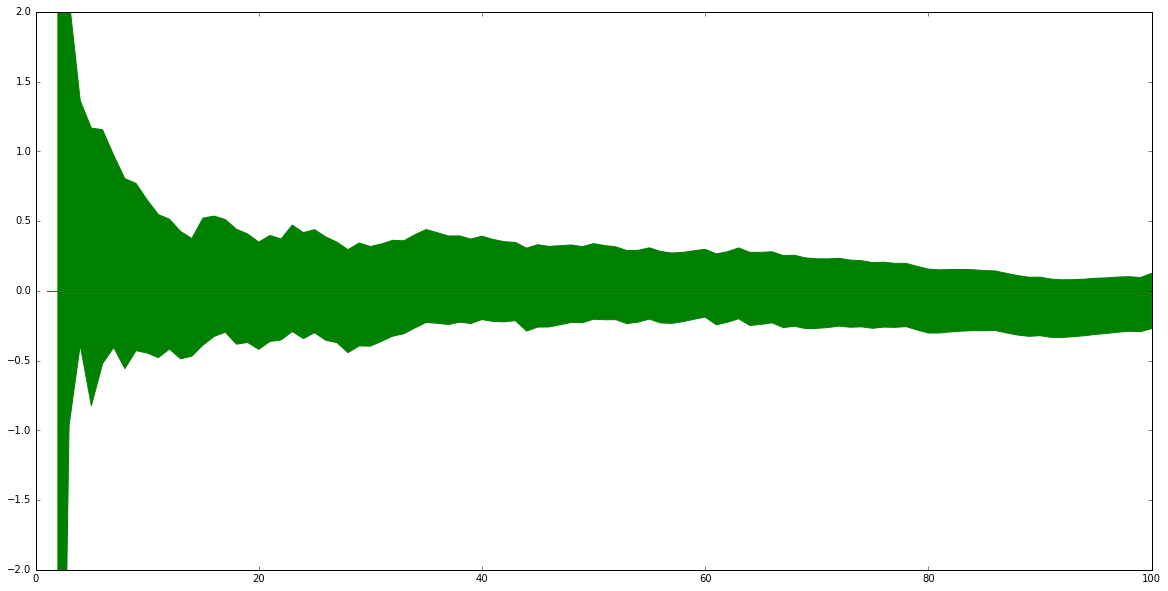

In [113]:
alpha = 0.05
quantile = [sts.t.ppf(1- alpha/2.,n) for n in range (0, N)]
est_left = np.array([X[:n].mean() - math.sqrt(X[:n].var()/(n-0.))*quantile[n-1]  for n in range(1,N+1,1)])
est_right = np.array([X[:n].mean() + math.sqrt(X[:n].var()/(n-0.))*quantile[n-1]  for n in range(1,N+1,1)])
x = np.arange(1,101,1)
plt.figure(figsize=(20,10))
plt.fill_between(x, est_left, est_right, color = "green")
plt.plot(x, np.linspace(0,0,100), color='red')
plt.ylim(-2,2)
plt.show()

А этот интервал очень похож на предыдущий, не сказать, что он хуже.

# (b)
### Пусть $X_1$,$\ldots$,$X_n \sim \mathcal{N}(\mu,\sigma^2)$ — независимая выборка из нормального распределения, где $\mu$ — известное среднее. Определим произвольное $\alpha \in [0,1]$ и построим $\alpha$ — доверительный интервал для неизвестной дисперсии $\sigma^2$.

### Утверждение. Случайная величина

   $\large H = \frac{\sum\limits_{i=1}^n(X_i-\mu)^2}{\sigma^2}$

### имеет распределение $\chi^2(n)$. Пусть $\chi^2_{\alpha,n}$ — $\alpha$-квантиль этого распределения. Тогда имеем:

   $\large\mathbb{P}\left(\chi^2_{\frac{1-\alpha}{2},n} \leqslant H \leqslant \chi^2_{\frac{1+\alpha}{2},n}\right) = \alpha$.

#### После подстановки выражения для H и несложных алгебраических преобразований получаем случай (b): 

   $\large\mathbb{P}\left( \frac{\sum\limits_{i=1}^n (X_i-\mu)^2}{\chi^2_{\frac{1+\alpha}{2},n}} \leqslant \sigma^2 \leqslant \frac{\sum\limits_{i=1}^n (X_i-\mu)^2}{\chi^2_{\frac{1-\alpha}{2},n}} \right) = \alpha$.

   $\large\gamma = \alpha = 0.95$

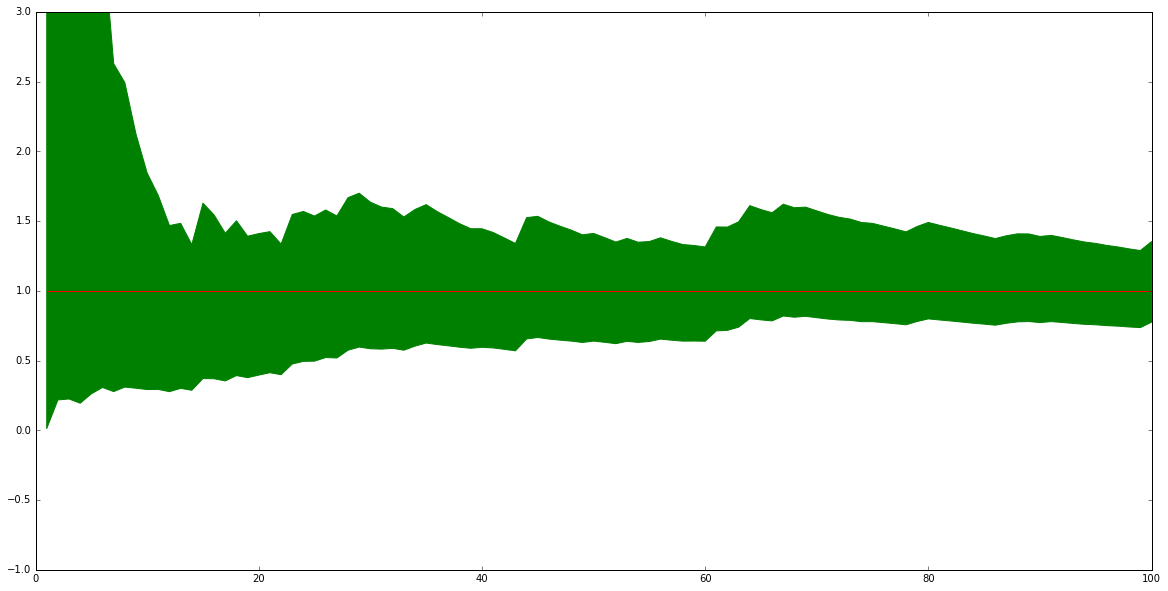

In [114]:
alpha = 0.95
quantile_plus = np.array([sts.chi2.ppf((1+ alpha)/2.,n) for n in range (0, N+1)])
quantile_minus = np.array([sts.chi2.ppf((1- alpha)/2.,n) for n in range (0, N+1)])

est_left = np.array([ (X[:n]**2).sum() / quantile_plus[n] for n in range(1,N+1)])
est_right = np.array([ (X[:n]**2).sum() / quantile_minus[n] for n in range(1,N+1)])

x = np.arange(1,101,1)
plt.figure(figsize=(20,10))
plt.fill_between(x, est_left, est_right, color = "green")
plt.plot(x, np.linspace(1,1,100), color='red')
plt.ylim(-1,3)
plt.show()

Снова прекрасный интервал.

# (d)
### Случай неизвестного среднего

### Пусть $X_1$,$\ldots$,$X_n \sim \mathcal{N}(\mu,\sigma^2)$ — независимая выборка из нормального распределения, где $\mu, \sigma^2$ — неизвестные константы. Построим доверительный интервал для неизвестной дисперсии $\sigma^2$.

### Теорема Фишера для нормальных выборок. Случайная величина

   $\large H = \frac{(n-1) S^2}{\sigma^2}$,

### где $\large S^2$ — несмещённая выборочная дисперсия, имеет распределение $\large\chi^2(n-1)$. Тогда имеем:

   $\large\mathbb{P}\left( \chi^2_{\frac{1-\alpha}{2},n-1} \leqslant H \leqslant\chi^2_{\frac{1+\alpha}{2},n-1}\right) =\alpha$.

#### После подстановки выражения для H и несложных алгебраических преобразований получаем пункт (d):

   $\large\mathbb{P}\left( \frac{(n-1) S^2}{\chi^2_{\frac{1+\alpha}{2},n-1}} \leqslant \sigma^2 \leqslant\frac{(n-1)S^2}{\chi^2_{\frac{1-\alpha}{2},n-1}} \right) = \alpha$. 

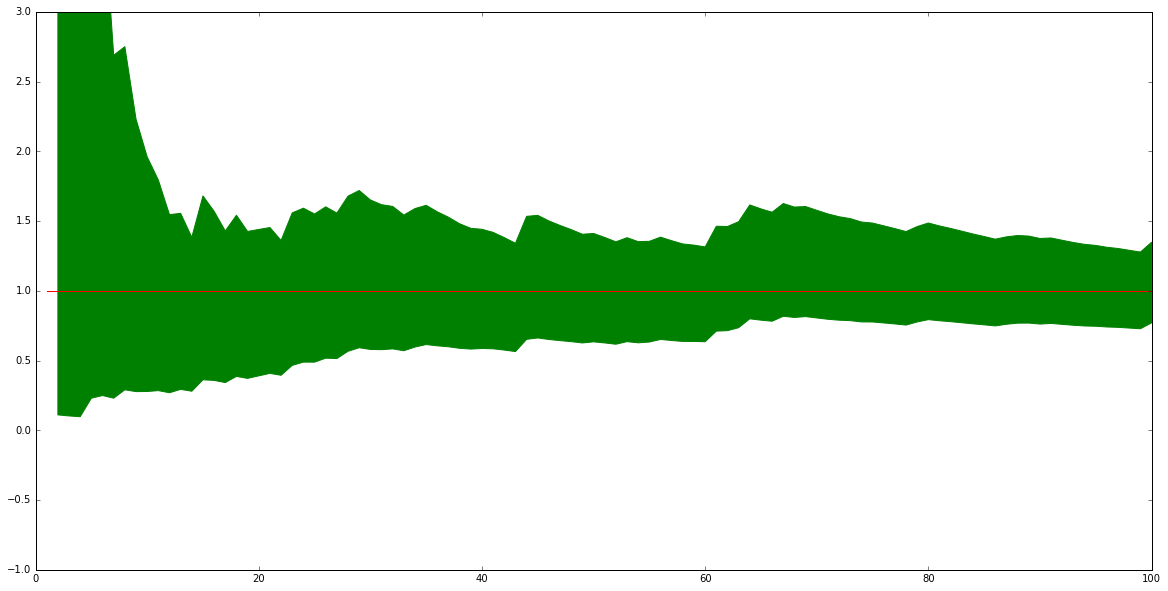

In [115]:
alpha = 0.95
# Квантили уже посчитаны
est_left = np.array([ X[:n].var()*(n-1) / quantile_plus[n-1] for n in range(1,N+1)])
est_right = np.array([ X[:n].var()*(n-1) / quantile_minus[n-1] for n in range(1,N+1)])

x = np.arange(1,101,1)
plt.figure(figsize=(20,10))
plt.fill_between(x, est_left, est_right, color = "green")
plt.plot(x, np.linspace(1,1,100), color='red')
plt.ylim(-1,3)
plt.show()

### Видно, что практически нет никакой разницы между тем, чтобы оценивать матожидание с известной дисперсией или с неизвестной дисперсией.

### Аналогично с оценкой дисперсии с известным/неизвестным матожиданием